In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib
import sys
import os

project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)



from MieSppForce import frenel, dipoles, green_func, force

c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

In [12]:
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

R = 295/2
dist = 0
a_angle = 0
phase=0
STOP=45
angle=25*np.pi/180
point = [0,0,dist+R]

z0 = point[2]

wls=np.linspace(800,1100,100)

P,M = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)

In [13]:
for i in tqdm(range(len(wls))):
    p,m = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

  5%|▌         | 5/100 [00:02<00:43,  2.19it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
 80%|████████  | 80/100 [00:35<00:08,  2.30it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
100%|██████████| 100/100 [00:44<00:00,  2.26it/s]


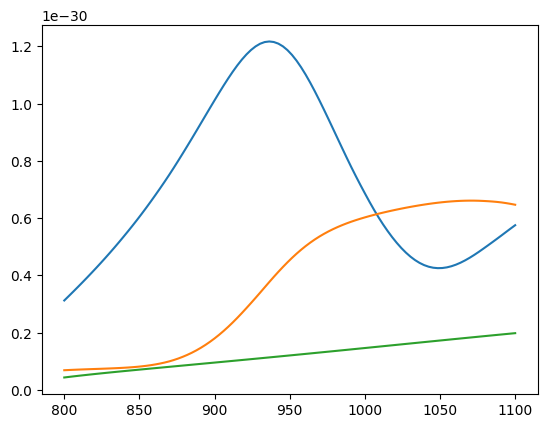

In [40]:
plt.plot(wls, abs(P[:,0]))
plt.plot(wls, abs(M[:,1])/c_const)
plt.plot(wls, abs(P[:,2]))

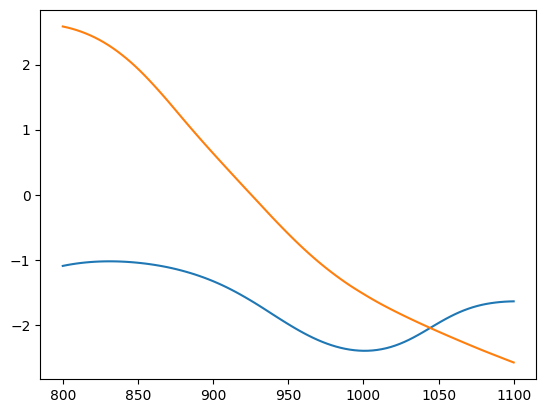

In [34]:
plt.plot(wls, np.angle(P[:,0]/P[:,2]))
plt.plot(wls, np.angle(M[:,1]/P[:,2]/c_const))

In [62]:
import numpy as np
from scipy.integrate import quad
c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7


def get_directivity(wl, P, M, eps_Au):
    px, py, pz = P
    mx, my, mz = M

    def I(phi): return np.abs((mx/c_const + np.sqrt(1/(eps_Au(wl)+1))*py)*np.sin(phi) + (my/c_const - np.sqrt(1/(eps_Au(wl)+1))*px)*np.cos(phi) - np.sqrt(eps_Au(wl)/(eps_Au(wl)+1))*pz)**2
    Imax = quad(I, 0, 2 * np.pi)[0]
    return lambda phi: 2 * np.pi * I(phi) / Imax


fwd = np.empty(len(wls))
bwd = np.empty(len(wls))


for i in range(len(wls)):
    D = get_directivity(wls[i], P[i,:], M[i,:], eps_Au)
    fwd_i = D(0)
    bwd_i = D(np.pi)
    
    fwd[i] = fwd_i
    bwd[i] = bwd_i

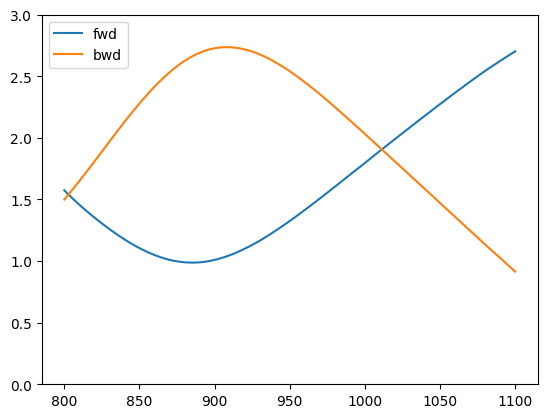

In [63]:
plt.plot(wls, fwd, label='fwd')
plt.plot(wls, bwd, label='bwd')
plt.ylim(0,3)
plt.legend()
plt.show()